In [65]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame  # Convert to DataFrame

In [66]:
df.describe()
df.shape

(20640, 9)

In [67]:
# separate dataset and target variable

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [68]:
from sklearn.neighbors import KNeighborsRegressor

mod = KNeighborsRegressor(n_neighbors=5) #create object model. 

In [69]:
mod.fit(X,y)

KNeighborsRegressor()

In [70]:
mod.predict(X)

array([2.826802, 2.1594  , 3.650404, ..., 1.2882  , 1.4418  , 1.7342  ])

In [71]:
from sklearn.linear_model import LinearRegression

mod2 = LinearRegression()

In [72]:
mod2.fit(X,y)

LinearRegression()

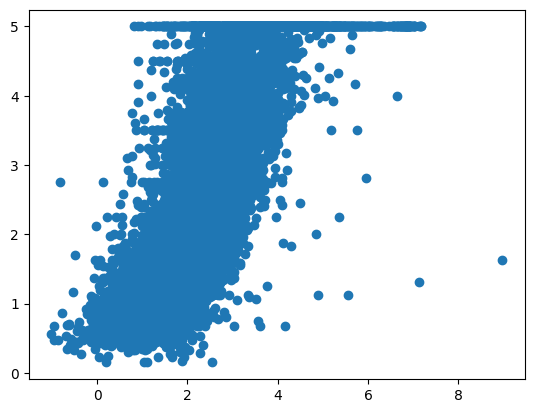

In [73]:
pred = mod2.predict(X)

import matplotlib.pyplot as plt

plt.scatter(pred, y)
plt.show()

### basic pipeline with scaling X and then feeding into model

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 

In [75]:
pipe = Pipeline([
    ("scale", StandardScaler()), 
    ("model", KNeighborsRegressor(n_neighbors=5))
])

In [76]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [77]:
pred_pipe = pipe.predict(X)

<function matplotlib.pyplot.show(close=None, block=None)>

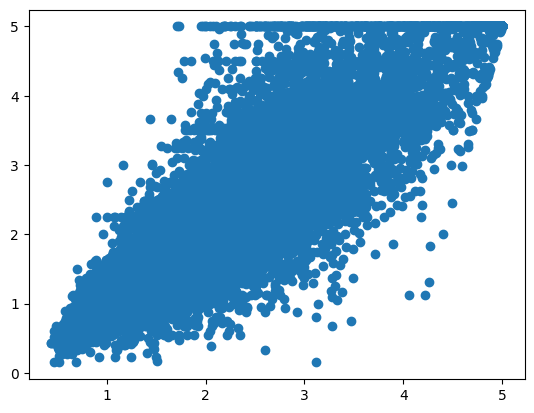

In [78]:
plt.scatter(pred_pipe, y)
plt.show

In [79]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [84]:
from sklearn.model_selection import GridSearchCV

mod3 = GridSearchCV(
    estimator=pipe, 
    param_grid={'model__n_neighbors': list(range(1,11))},
    cv=4
)

In [85]:
mod3.fit(X,y)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [86]:
pd.DataFrame(mod3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035614,0.006327,0.149041,0.016884,1,{'model__n_neighbors': 1},0.208390,0.361910,0.363192,0.359705,0.323299,0.066355,10
1,0.032778,0.002914,0.206839,0.031971,2,{'model__n_neighbors': 2},0.379434,0.495587,0.458605,0.442276,0.443976,0.041971,9
2,0.036957,0.003139,0.252271,0.045394,3,{'model__n_neighbors': 3},0.442350,0.536715,0.493476,0.480436,0.488244,0.033705,8
3,0.034835,0.002027,0.251948,0.024732,4,{'model__n_neighbors': 4},0.463323,0.562518,0.513498,0.497806,0.509286,0.035692,7
4,0.026900,0.005480,0.263361,0.029286,5,{'model__n_neighbors': 5},0.479629,0.567869,0.523445,0.506445,0.519347,0.032075,6
5,0.028528,0.002893,0.273341,0.030611,6,{'model__n_neighbors': 6},0.494535,0.574495,0.530618,0.512813,0.528115,0.029661,5
6,0.030833,0.005947,0.287392,0.027189,7,{'model__n_neighbors': 7},0.508451,0.578142,0.540095,0.517491,0.536045,0.026899,4
7,0.033795,0.003092,0.286261,0.024493,8,{'model__n_neighbors': 8},0.514624,0.580005,0.544138,0.520617,0.539846,0.025676,3
8,0.032590,0.003673,0.297213,0.033395,9,{'model__n_neighbors': 9},0.520425,0.580845,0.545299,0.522620,0.542297,0.024293,2
9,0.032404,0.005611,0.301824,0.033506,10,{'model__n_neighbors': 10},0.523963,0.581954,0.549362,0.524104,0.544846,0.023789,1
